In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Libraries for Text data
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the dataset
data = pd.read_csv('hotel_reviews.csv')
data.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
data.shape

(20491, 2)

In [6]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [7]:
rating = data['Rating'].value_counts()
rating

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

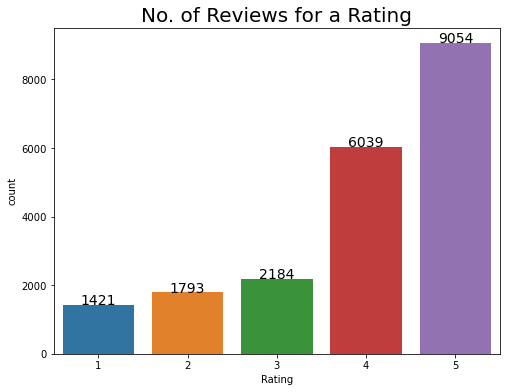

In [8]:
fig, ax = plt.subplots(1, 1,figsize= (8,6))
sns.countplot(x='Rating',data=data, ax=ax)
for rect in ax.patches:
        height = rect.get_height()
        if np.isnan(height):
            height = 0
        width = rect.get_width()
        if np.isnan(width):
            width = 0
        x = rect.get_x()
        y = rect.get_y()
        label_x = x + width / 2
        label_y = y + height + 10
        ax.text(label_x, label_y, round(height), ha='center' ,fontsize= 14)

plt.title('No. of Reviews for a Rating',fontsize= 20)
plt.show()

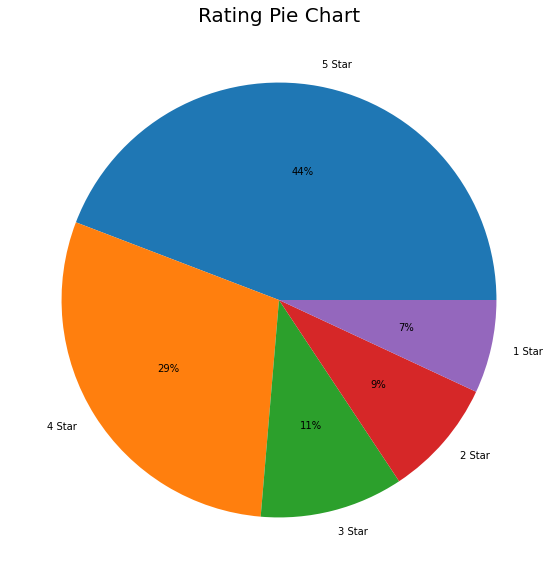

In [9]:
fig, ax = plt.subplots(1, 1,figsize= (10,10))
label = [ '5 Star','4 Star', '3 Star', '2 Star','1 Star']
ax.pie(list(rating.values), labels = label, autopct='%.0f%%')
plt.title('Rating Pie Chart', fontsize=20)
plt.show()

## Text Preprocessing

In [10]:
# Copy the Data
data1 = data.copy()
data1.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

In [11]:
# Word Length of reviews
data1['word_len_review'] = data1['Review'].apply(lambda x: len(x.split()))
data1.head()

Review  Rating  word_len_review
0  nice hotel expensive parking got good deal sta...       4               87
1  ok nothing special charge diamond member hilto...       2              250
2  nice rooms not 4* experience hotel monaco seat...       3              217
3  unique, great stay, wonderful time hotel monac...       5               89
4  great stay great stay, went seahawk game aweso...       5              191

In [12]:
# String Length of reviews
data1['string_len_review'] = data1['Review'].apply(lambda x: len(x))
data1.head()

Review  Rating  word_len_review  \
0  nice hotel expensive parking got good deal sta...       4               87   
1  ok nothing special charge diamond member hilto...       2              250   
2  nice rooms not 4* experience hotel monaco seat...       3              217   
3  unique, great stay, wonderful time hotel monac...       5               89   
4  great stay great stay, went seahawk game aweso...       5              191   

   string_len_review  
0                593  
1               1689  
2               1427  
3                600  
4               1281

In [13]:
# Plot Average Word Length review was written for a perticular rating
df = data1.groupby('Rating').agg('mean').reset_index()
df

Rating  word_len_review  string_len_review
0       1       112.365236         769.534835
1       2       126.601227         867.002789
2       3       114.705586         784.664835
3       4       107.771651         745.339957
4       5        93.963773         661.696488

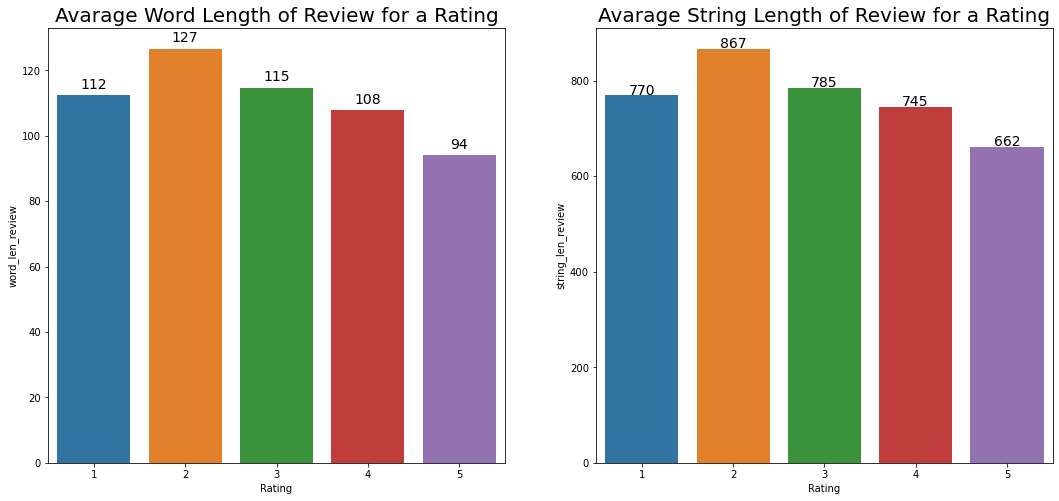

In [14]:
fig, axes = plt.subplots(1, 2 ,figsize= (18,8))
(ax1,ax2) = axes

# Plot for word_len_review
sns.barplot(y='word_len_review',x='Rating',data=df, ax=ax1)
for rect in ax1.patches:
        height = rect.get_height()
        if np.isnan(height):
            height = 0
        width = rect.get_width()
        if np.isnan(width):
            width = 0
        x = rect.get_x()
        y = rect.get_y()
        label_x = x + width / 2
        label_y = y + height +2
        ax1.text(label_x, label_y, round(height), ha='center' ,fontsize= 14)

ax1.set_title('Avarage Word Length of Review for a Rating',fontsize= 20)

# Plot for word_len_review
sns.barplot(y='string_len_review',x='Rating',data=df, ax=ax2)
for rect in ax2.patches:
        height = rect.get_height()
        if np.isnan(height):
            height = 0
        width = rect.get_width()
        if np.isnan(width):
            width = 0
        x = rect.get_x()
        y = rect.get_y()
        label_x = x + width / 2
        label_y = y + height +2
        ax2.text(label_x, label_y, round(height), ha='center' ,fontsize= 14)

ax2.set_title('Avarage String Length of Review for a Rating',fontsize= 20)
plt.show()

In [15]:
# Lowercase the reviews
data1['cleaned']=data1['Review'].apply(lambda x: x.lower())
data1.head()

Review  Rating  word_len_review  \
0  nice hotel expensive parking got good deal sta...       4               87   
1  ok nothing special charge diamond member hilto...       2              250   
2  nice rooms not 4* experience hotel monaco seat...       3              217   
3  unique, great stay, wonderful time hotel monac...       5               89   
4  great stay great stay, went seahawk game aweso...       5              191   

   string_len_review                                            cleaned  
0                593  nice hotel expensive parking got good deal sta...  
1               1689  ok nothing special charge diamond member hilto...  
2               1427  nice rooms not 4* experience hotel monaco seat...  
3                600  unique, great stay, wonderful time hotel monac...  
4               1281  great stay great stay, went seahawk game aweso...

In [16]:
# Remove digits and punctuation marks
data1['cleaned']=data1['cleaned'].apply(lambda x: re.sub('[^a-z]',' ', x))
data1.head()

Review  Rating  word_len_review  \
0  nice hotel expensive parking got good deal sta...       4               87   
1  ok nothing special charge diamond member hilto...       2              250   
2  nice rooms not 4* experience hotel monaco seat...       3              217   
3  unique, great stay, wonderful time hotel monac...       5               89   
4  great stay great stay, went seahawk game aweso...       5              191   

   string_len_review                                            cleaned  
0                593  nice hotel expensive parking got good deal sta...  
1               1689  ok nothing special charge diamond member hilto...  
2               1427  nice rooms not    experience hotel monaco seat...  
3                600  unique  great stay  wonderful time hotel monac...  
4               1281  great stay great stay  went seahawk game aweso...

In [17]:
# Removing extra spaces if present
data1['cleaned']=data1['cleaned'].apply(lambda x: re.sub(' +',' ',x))
data1.head()

Review  Rating  word_len_review  \
0  nice hotel expensive parking got good deal sta...       4               87   
1  ok nothing special charge diamond member hilto...       2              250   
2  nice rooms not 4* experience hotel monaco seat...       3              217   
3  unique, great stay, wonderful time hotel monac...       5               89   
4  great stay great stay, went seahawk game aweso...       5              191   

   string_len_review                                            cleaned  
0                593  nice hotel expensive parking got good deal sta...  
1               1689  ok nothing special charge diamond member hilto...  
2               1427  nice rooms not experience hotel monaco seattle...  
3                600  unique great stay wonderful time hotel monaco ...  
4               1281  great stay great stay went seahawk game awesom...

In [18]:
#display(HTML(data1.to_html()))

### Stemming and Lemmatization

In [19]:
def stem(text):
    ps = PorterStemmer()
    for i in range(len(text)):
        review = word_tokenize(text)
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        return review
    
def lemma(text):
    wordnet=WordNetLemmatizer()
    for i in range(len(text)):
        review = word_tokenize(text)
        review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        return review

In [20]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

In [21]:
data1['stemming']=data1['cleaned'].progress_apply(lambda x: stem(x))
data1.head()

  0%|          | 0/20491 [00:00<?, ?it/s]

Review  Rating  word_len_review  \
0  nice hotel expensive parking got good deal sta...       4               87   
1  ok nothing special charge diamond member hilto...       2              250   
2  nice rooms not 4* experience hotel monaco seat...       3              217   
3  unique, great stay, wonderful time hotel monac...       5               89   
4  great stay great stay, went seahawk game aweso...       5              191   

   string_len_review                                            cleaned  \
0                593  nice hotel expensive parking got good deal sta...   
1               1689  ok nothing special charge diamond member hilto...   
2               1427  nice rooms not experience hotel monaco seattle...   
3                600  unique great stay wonderful time hotel monaco ...   
4               1281  great stay great stay went seahawk game awesom...   

                                            stemming  
0  nice hotel expens park got good deal stay hote...  
1  ok noth special charg diamond member hilton de...  
2  nice room experi hotel monaco seattl good hote...  
3  uniqu great stay wonder time hotel monaco loca...  
4  great stay great stay went seahawk game awesom...

In [22]:
# data1['stemming'].apply(lambda x: print(x,'\n'))

In [23]:
# data1['cleaned'].apply(lambda x: print(x,'\n'))

In [24]:
data1['lemmatization']=data1['cleaned'].progress_apply(lambda x: lemma(x))
data1.head()

  0%|          | 0/20491 [00:00<?, ?it/s]

Review  Rating  word_len_review  \
0  nice hotel expensive parking got good deal sta...       4               87   
1  ok nothing special charge diamond member hilto...       2              250   
2  nice rooms not 4* experience hotel monaco seat...       3              217   
3  unique, great stay, wonderful time hotel monac...       5               89   
4  great stay great stay, went seahawk game aweso...       5              191   

   string_len_review                                            cleaned  \
0                593  nice hotel expensive parking got good deal sta...   
1               1689  ok nothing special charge diamond member hilto...   
2               1427  nice rooms not experience hotel monaco seattle...   
3                600  unique great stay wonderful time hotel monaco ...   
4               1281  great stay great stay went seahawk game awesom...   

                                            stemming  \
0  nice hotel expens park got good deal stay hote...   
1  ok noth special charg diamond member hilton de...   
2  nice room experi hotel monaco seattl good hote...   
3  uniqu great stay wonder time hotel monaco loca...   
4  great stay great stay went seahawk game awesom...   

                                       lemmatization  
0  nice hotel expensive parking got good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice room experience hotel monaco seattle good...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay went seahawk game awesom...

In [25]:
corpus = " ".join(data1['lemmatization'].to_list())
# corpus

### WordCloud

In [26]:
from wordcloud import WordCloud

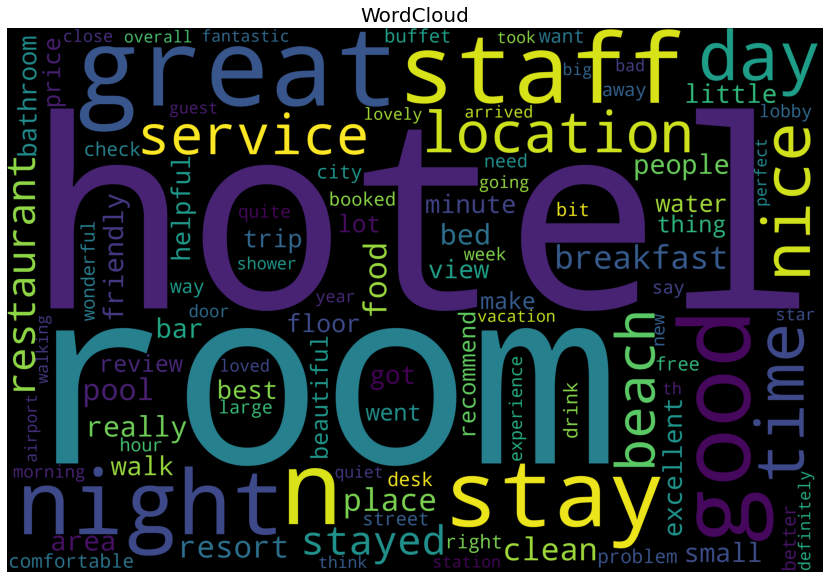

In [27]:
# Word Cloud for cumplete DataSet
wordcloud1 = WordCloud(width = 3000, height = 2000, random_state=1, max_words=100, #background_color='white',colormap='Set2',
                       collocations=False).generate(str(corpus ))
plt.figure(figsize=(15,10))
plt.title('WordCloud', fontsize=20)
plt.axis("off")
plt.imshow(wordcloud1)

### Sentiment Analysis

In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [52]:
data2 = data1[['Review', 'Rating']]
data2.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

In [53]:
# Sentiment Analysis based on NLTK
sid = SentimentIntensityAnalyzer()
data2['nltk_sentiment'] = data1['lemmatization'].apply(lambda x: sid.polarity_scores(x)['compound'])
data2.head()

Review  Rating  nltk_sentiment
0  nice hotel expensive parking got good deal sta...       4          0.9808
1  ok nothing special charge diamond member hilto...       2          0.9952
2  nice rooms not 4* experience hotel monaco seat...       3          0.9921
3  unique, great stay, wonderful time hotel monac...       5          0.9949
4  great stay great stay, went seahawk game aweso...       5          0.9955

In [55]:
# data2.sort_values('nltk_sentiment')
display(HTML(data2[['Rating', 'nltk_sentiment']].sort_values('nltk_sentiment').to_html()))

In [61]:
def sentiment(score):
    emotion = ""
    if score >= 0.5:
        emotion = "Positive"
    elif score <= -0.5:
        emotion = "Negative"
    else:
        emotion = "Neutral"
    return emotion

data2['sentiment'] = data2['nltk_sentiment'].apply(sentiment)
data2.head()

Review  Rating  nltk_sentiment  \
0  nice hotel expensive parking got good deal sta...       4          0.9808   
1  ok nothing special charge diamond member hilto...       2          0.9952   
2  nice rooms not 4* experience hotel monaco seat...       3          0.9921   
3  unique, great stay, wonderful time hotel monac...       5          0.9949   
4  great stay great stay, went seahawk game aweso...       5          0.9955   

  sentiment  
0  Positive  
1  Positive  
2  Positive  
3  Positive  
4  Positive

In [62]:
display(HTML(data2[['Rating', 'nltk_sentiment', 'sentiment']].sort_values('nltk_sentiment').to_html()))

In [63]:
fig, ax = plt.subplots(1, 1,figsize= (8,6))
sns.countplot(x='sentiment',data=data2, ax=ax)
for rect in ax.patches:
        height = rect.get_height()
        if np.isnan(height):
            height = 0
        width = rect.get_width()
        if np.isnan(width):
            width = 0
        x = rect.get_x()
        y = rect.get_y()
        label_x = x + width / 2
        label_y = y + height + 10
        ax.text(label_x, label_y, round(height), ha='center' ,fontsize= 14)

plt.title('No. of Sentimental Reviews',fontsize= 20)
plt.show()

In [64]:
sent_value = data2['sentiment'].value_counts()
sent_value

Positive    18960
Neutral       809
Negative      722
Name: sentiment, dtype: int64

In [66]:
fig, ax = plt.subplots(1, 1,figsize= (10,10))
label = ['Positive', 'Neutral', 'Negative']
ax.pie(list(sent_value.values), labels = label, autopct='%.1f%%')
plt.title('Sentimental Reviews Pie Chart', fontsize=20)
plt.show()

In [77]:
rat_1 = data2.loc[data2['Rating']==1, :]['sentiment'].value_counts(normalize = True)
rat_2 = data2.loc[data2['Rating']==2, :]['sentiment'].value_counts(normalize = True)
rat_3 = data2.loc[data2['Rating']==3, :]['sentiment'].value_counts(normalize = True)
rat_4 = data2.loc[data2['Rating']==4, :]['sentiment'].value_counts(normalize = True)
rat_5 = data2.loc[data2['Rating']==5, :]['sentiment'].value_counts(normalize = True)

data2_plot  = pd.DataFrame([rat_1,rat_2,rat_3,rat_4,rat_5])
data2_plot.index=['1','2','3','4','5']
data2_plot

Positive  Negative   Neutral
1  0.413089  0.351161  0.235749
2  0.757948  0.096486  0.145566
3  0.932234  0.014652  0.053114
4  0.989899  0.001656  0.008445
5  0.994036  0.000884  0.005081

<AxesSubplot:title={'center':'Stacked Bar plot'}>

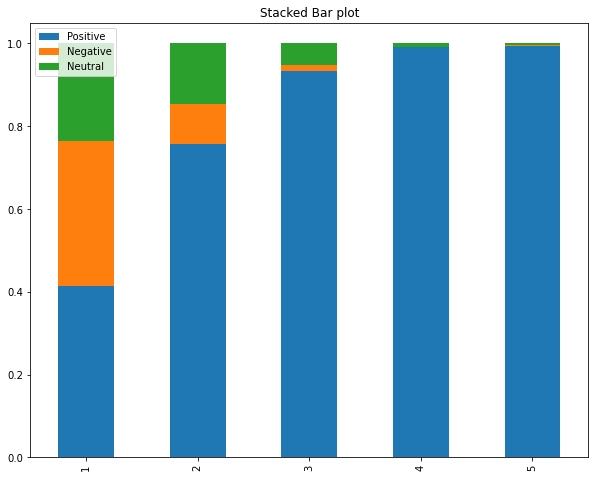

In [76]:
data2_plot.plot(kind='bar',figsize = (10,8),stacked=True, title='Stacked Bar plot')

In [78]:
rat_1 = data2.loc[data2['Rating']==1, :]['sentiment'].value_counts()
rat_2 = data2.loc[data2['Rating']==2, :]['sentiment'].value_counts()
rat_3 = data2.loc[data2['Rating']==3, :]['sentiment'].value_counts()
rat_4 = data2.loc[data2['Rating']==4, :]['sentiment'].value_counts()
rat_5 = data2.loc[data2['Rating']==5, :]['sentiment'].value_counts()

data2_plot  = pd.DataFrame([rat_1,rat_2,rat_3,rat_4,rat_5])
data2_plot.index=['1','2','3','4','5']
data2_plot

Positive  Negative  Neutral
1       587       499      335
2      1359       173      261
3      2036        32      116
4      5978        10       51
5      9000         8       46

In [79]:
data2_plot.plot(kind='bar',figsize = (10,8),stacked=True, title='Stacked Bar plot')

<AxesSubplot:title={'center':'Stacked Bar plot'}>